<a href="https://colab.research.google.com/github/Marziesoltani/symmetric-travelling-salesman-problem/blob/main/STSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Symmetric Travelling Salesman Problem

In [ ]:
from scipy.sparse.csgraph import minimum_spanning_tree
from google.colab import files
from io import BytesIO
import networkx as nx
import pandas as pd
import numpy as np
import itertools
import xlrd 
import copy
import math 

In [ ]:
uploaded = files.upload()
file = BytesIO(uploaded['matrix.xlsx'])

Saving matrix.xlsx to matrix (1).xlsx


In [ ]:
def read_sheet(file):
    sheet = pd.read_excel(file).fillna(0)
    sheet = sheet.to_numpy()
    graph = sheet[:-1, 1:].astype(np.float32)
    u = sheet[-1, 1:].astype(np.float32)
    v, v = graph.shape
    return graph, u, v 

In [ ]:
graph, u, v = read_sheet(file)

In [ ]:
def solve(graph, u, v):
    # Calculating c\bar
    for i in range(v):
        for j in range(i + 1, v):
            graph[i][j] = graph[i][j] - u[i] - u[j]
    # Finding 1-Tree
    mst_graph = copy.deepcopy(graph)
    for i in range(1, v):
        mst_graph[i][0] = math.inf
        mst_graph[0][i] = math.inf
    one_tree = minimum_spanning_tree(mst_graph)
    # Calculating the Lower Bound
    stsp = one_tree.toarray()
    stsp[0, :] = np.where([element > np.partition(graph[0, :], 2)[2] for element in graph[0, :]], stsp[0, :], graph[0, :])
    # Visualizating the Graph
    edges = [(x + 1, y + 1) for x, y in zip(*stsp.nonzero())]
    G = nx.Graph()
    for node_tuple in edges:
      G.add_edges_from(itertools.product(node_tuple, node_tuple))
    return print("Lower Bond:", np.sum(stsp) + 2 * np.sum(u)), nx.draw_networkx(G, pos=nx.spring_layout(G), node_color='c', node_size=500, font_size=15)

Lower Bond: 148.0


(None, None)

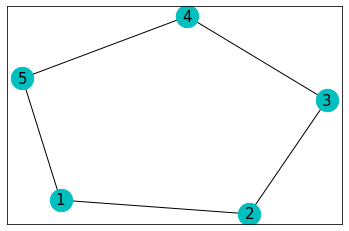

In [ ]:
solve(graph, u, v)